# Some statistic for top.committer

By [Xin (Daniel) Feng](https://danielslab.dev/)

## Data Preparation

In [ ]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

FILE_NAME : str = "data.csv"
refetch : bool = False

def load_data(retry : int) -> DataFrame:
    global refetch

    if (retry <= 0):
        raise Exception("Failed to load data after multiple attempts.")

    try:
        if refetch:
            refetch = False
            raise Exception("Forcing re-fetch.")

        return pd.read_csv(FILE_NAME)
    except Exception:
        from top_committer_fetcher import fetcher
        fetcher()
        return load_data(retry - 1)

df = load_data(3)
df.head()

,country,rank_type,user_id,contribs
0,Afghanistan,commit,Nasratullah-Shafiq,3713
1,Afghanistan,commit,MastooraTurkmen,2044
2,Afghanistan,commit,Hussain-hamim,1972
3,Afghanistan,commit,sulaimanQasimi,1652
4,Afghanistan,commit,WiyarAhmadZai,1478


## Data Cleaning

In [27]:
# Check outliers
df.isnull().sum()

country      0
rank_type    0
user_id      0
contribs     0
dtype: int64

In [44]:
df.sort_values(by="contribs", ascending=False, inplace=True)
df.head(20)

,country,rank_type,user_id,contribs
6656,Azerbaijan,private,qabilm,111986481
6400,Azerbaijan,public,qabilm,111986481
6144,Azerbaijan,commit,qabilm,111986480
77463,Philippines,private,0x3EF8,20456296
77207,Philippines,public,0x3EF8,20456085
76951,Philippines,commit,0x3EF8,20456060
77464,Philippines,private,eru123,15945918
77208,Philippines,public,eru123,15944563
76952,Philippines,commit,eru123,15944559
77465,Philippines,private,xiv3r,6292446


In [45]:
df.tail(20)

,country,rank_type,user_id,contribs
98532,The Bahamas,commit,ShoneNairn,0
98531,The Bahamas,commit,manerpuyawan,0
98530,The Bahamas,commit,snsmith92,0
98529,The Bahamas,commit,a9eesh,0
98528,The Bahamas,commit,byabbie,0
98526,The Bahamas,commit,daninthiaf,0
98513,The Bahamas,commit,IndyZR,0
98525,The Bahamas,commit,VedaBeans,0
98524,The Bahamas,commit,FEMSTEM242,0
98523,The Bahamas,commit,ManInTheSky,0


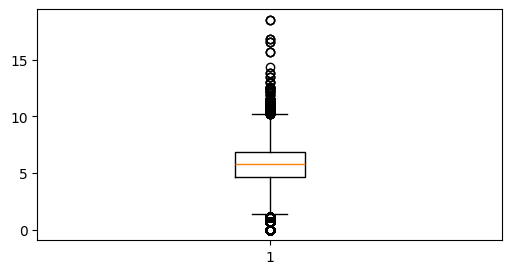

In [47]:
import numpy as np

plt.figure(figsize=(6, 3))
plt.boxplot(np.log1p(df["contribs"]), vert=True)
plt.show()

Removed 8465 outliers
10
0


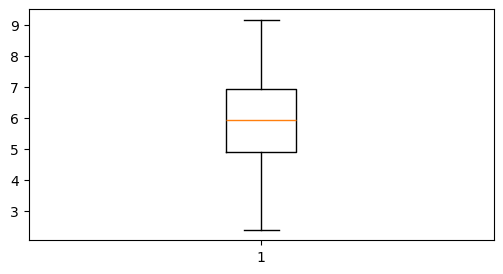

In [59]:
q1 = df["contribs"].quantile(0.25)
q3 = df["contribs"].quantile(0.75)
iqr = q3 - q1

lower = 10
upper = q3 + 10 * iqr

filtered = df[(df["contribs"] >= lower) & (df["contribs"] <= upper)]
print(f"Removed {len(df) - len(filtered)} outliers")

print(lower)
print(df["contribs"].min())

plt.figure(figsize=(6, 3))
plt.boxplot(np.log1p(filtered["contribs"]), vert=True)
plt.show()

## Statistic

In [58]:
# Use contributes among all repos
all = filtered[filtered["rank_type"] == "private"].sort_values(by="contribs", ascending=False)
all.head()

,country,rank_type,user_id,contribs
15105,Burundi,private,arsou2015,18010
8195,Bangladesh,private,shimantosarkar,17993
5121,Australia,private,SimonCropp,17986
104338,UK,private,steipete,17966
104339,UK,private,danielroe,17940


Finland is ranked #27 in average contributions per country.


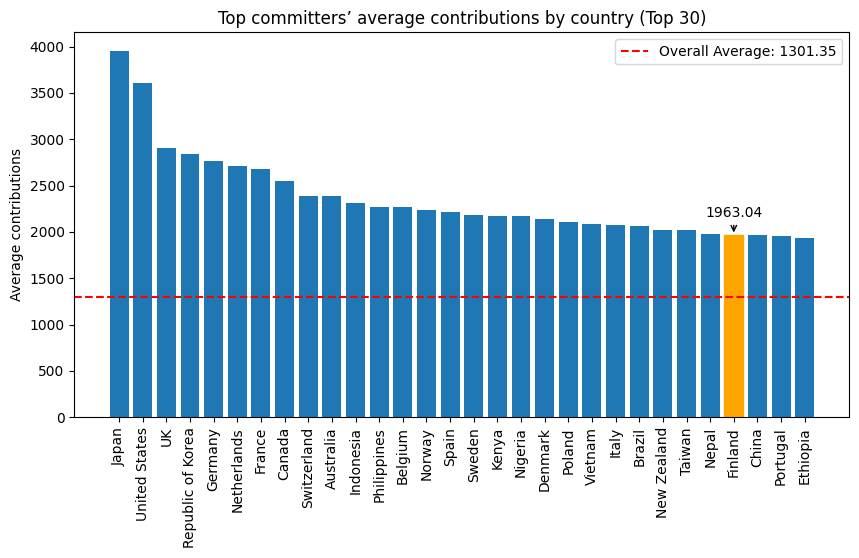

In [95]:
# Average contributes per country
avg = (
    filtered[filtered["rank_type"] == "private"]
    .groupby("country", as_index=False)["contribs"]
    .mean()
)

avg.sort_values(by="contribs", ascending=False, inplace=True)
avg.reset_index(drop=True, inplace=True)

avg.head()

fi_idx = avg[avg["country"] == "Finland"].index[0]
print(f"Finland is ranked #{fi_idx + 1} in average contributions per country.")

avg_top30 = avg.head(30)
plt.figure(figsize=(10, 5))
plt.bar(avg_top30["country"], avg_top30["contribs"])
plt.xticks(rotation=90)
plt.ylabel("Average contributions")
plt.title("Top committers’ average contributions by country (Top 30)")

plt.gca().patches[fi_idx].set_color("orange")
plt.gca().annotate(
    f"{avg.iloc[fi_idx]['contribs']:.2f}",
    xy=(fi_idx, avg.iloc[fi_idx]['contribs']),
    xytext=(fi_idx, avg.iloc[fi_idx]['contribs'] + 200),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    ha='center'
)

avg_mean = avg["contribs"].mean()

# also show the average line
plt.axhline(y=avg_mean, color='r', linestyle='--', label=f"Overall Average: {avg_mean:.2f}")
plt.legend()
plt.show()